In [ ]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import json
import numpy as np

# Data

In [372]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'drinkingwaste',
 'drinkingwaste.zip',
 'equation.png',
 'feature-extractor.h5',
 'garbage.zip',
 'mobilenet_7_5_224_tf.h5',
 'naive.svg',
 'prefetched.svg',
 'Recyle-Trash Detection Development.ipynb',
 'taco',
 'taco.zip',
 'test.h5',
 'trash.zip']

In [373]:
taco = pd.read_csv('taco\meta_df.csv')
taco.head()

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0,127.0,447.0,1322.0,403954.0
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0,457.0,1429.0,1519.0,1071259.5
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0,292.0,1006.0,672.0,99583.5
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0,987.0,500.0,374.0,73832.5
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0,989.0,44.0,51.0,915.0


In [374]:
taco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   img_id         4784 non-null   int64  
 1   img_width      4784 non-null   int64  
 2   img_height     4784 non-null   int64  
 3   img_file       4784 non-null   object 
 4   cat_id         4784 non-null   int64  
 5   cat_name       4784 non-null   object 
 6   supercategory  4784 non-null   object 
 7   ann_id         4784 non-null   int64  
 8   x              4784 non-null   float64
 9   y              4784 non-null   float64
 10  width          4784 non-null   float64
 11  height         4784 non-null   float64
 12  area           4784 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 486.0+ KB


In [ ]:
f, ax = plt.subplots(1,3)
for i in range(0, 3):
    image = cv2.imread(taco.iloc[i, 3])
    x=taco.loc[i, ["x"]].astype('int').values[0]
    y=taco.loc[i, ["y"]].astype('int').values[0]
    w=taco.loc[i, ["width"]].astype('int').values[0]
    h=taco.loc[i, ["height"]].astype('int').values[0]
    category = taco.loc[i, ["cat_name"]].values[0]
    cv2.putText(image, category, (x,y), 0, 5, (255, 0, 0), 15, cv2.LINE_AA)
    image = cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 10)
    ax[int(i%3)].imshow(image, cmap='gray')

In [ ]:
taco["cat_name"].value_counts(),len(taco["cat_name"].value_counts().to_list())

In [ ]:
os.listdir(os.getcwd())

In [ ]:
parent = os.listdir('drinkingwaste\Images_of_Waste\YOLO_imgs')
data = os.path.join('drinkingwaste', 'Images_of_Waste', 'YOLO_imgs',data[1])

In [ ]:
open(data, "r").read().split(' ')

In [ ]:
i=30
image = cv2.imread(data[i])
coord=open(data[i+1], "r").read()
x= int(float(open(data[i+1], "r").read().split(' ')[1])*512)
y= int(float(open(data[i+1], "r").read().split(' ')[2])*638)
w= int(float(open(data[i+1], "r").read().split(' ')[3])*512)
h= int(float(open(data[i+1], "r").read().split(' ')[4])*638)
x-=w//2
y-=h//2

category = data[i].split(',')[0]
cv2.putText(image, category, (x,y), 0, 5, (255, 0, 0), 15, cv2.LINE_AA)
image = cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 10)
plt.imshow(image, cmap='gray')

In [ ]:
trashmap = {
    'AluCan':'Aluminum can',
    'Glass' : 'Glass bottle',
    'HDPEM' : 'Nonclear plastic bottle',
    'PET' : 'Clear plastic bottle
}

In [ ]:
for i in range(0,len(parent),2):
    category = ""
    img = parent[i]
    if img[:3] == 'PET':
        category = trashmap[img[:3]]
    elif img[:6] == 'AluCan':
        category = trashmap[img[:6]]
    elif img[:5] == 'HDPEM':
        category = trashmap[img[:5]]
    elif img[:5] == 'Glass':
        category = trashmap[img[:5]]
    imgpath=os.path.join('drinkingwaste', 'Images_of_Waste', 'YOLO_imgs',img)
    meta = os.path.join('drinkingwaste', 'Images_of_Waste', 'YOLO_imgs',parent[i+1])
    print(imgpath)
    print(meta)
    shape = cv2.imread(imgpath).shape
    x=float(open(meta, "r").read().split(' ')[1])*shape[0]
    y=float(open(meta, "r").read().split(' ')[2])*shape[1]
    w=float(open(meta, "r").read().split(' ')[3])*shape[0]
    h=float(open(meta, "r").read().split(' ')[4])*shape[1]
    x-=w//2
    y-=h//2
    print(shape, open(meta, "r").read(), x,y,w,h)
    #taco.iloc[-1, :] = [4783, 0, 0, 0, path, category, "", 0, x, y, w, h,0]

In [ ]:
int(float(open('drinkingwaste\Images_of_Waste\YOLO_imgs\AluCan1,000.txt', "r").read().split(' ')[1])*683)

In [ ]:
image = cv2.imread('drinkingwaste\Images_of_Waste\YOLO_imgs\AluCan1,001.jpg')
x=369
y=145
w=204
h=92

x-=w//2
y-=h//2

category = 'AluCan'
cv2.putText(image, category, (x,y), 0, 2, (255, 0, 0), 5, cv2.LINE_AA)
image = cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 10)
plt.imshow(image, cmap='gray')

This dataset is no good, bounding boxes way off, don't use school project datasets

In [416]:
classmap = pd.factorize(taco["cat_name"])[1]

In [417]:
taco["cat_name"]=pd.factorize(taco["cat_name"])[0]

In [432]:
images=[]
bboxes=[]
y=taco["cat_name"].to_list()

i=0
for index, row in taco.iterrows():
    #print(row)
    #images.append(cv2.imread(os.path.join('taco\data', row[3]).replace('/', '\\')))
    images.append(os.path.join('taco\data', row[3]).replace('/', '\\'))
    bboxes.append([row[8], row[9], row[10], row[11]])
    i+=1

In [ ]:
mid=3
end=40

train_images = images[:mid]
train_bboxes = bboxes[:mid]
train_labels = y[:mid]

valid_images = images[mid:end]
valid_bboxes = bboxes[mid:end]
valid_labels = y[mid:end]

test_images = images[end:]
test_bboxes = bboxes[end:]
test_labels = y[end:]

X_train = train_images
y_train = np.array((train_bboxes, train_labels), dtype="object")
X_test = test_images
y_test = np.array((test_bboxes, test_labels), dtype="object")

In [440]:
len(images)*0.8

3827.2000000000003

In [700]:
num_classes=59
width=320
height=256
def read_image_bbox(path, bbox, label_index):
    """ Image """
    path = path.decode()
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    h, w, _ = image.shape
    image = cv2.resize(image, (width, height))
    image = image/ 255.0 ## [-1, +1]
    image = image.astype(np.float32)

    """ Bounding box """
    x, y, w, h = bbox
    
    x1, y1 = x-w/2, y-h/2
    x2, y2 = x+w/2, y+h/2

    norm_x1 = float(x1/w)
    norm_y1 = float(y1/h)
    norm_x2 = float(x2/w)
    norm_y2 = float(y2/h)
    norm_bbox = np.array([norm_x1, norm_y1, norm_x2, norm_y2], dtype=np.float32)

    label = [0] * num_classes
    label[label_index-1] = 1
    class_label = np.array(label, dtype=np.float32)#.reshape(1,-1)
    #print(image.shape, norm_bbox.shape, class_label.shape)

    return image, norm_bbox, class_label

def parse(image, bbox, label):
    image, bbox, label = tf.numpy_function(read_image_bbox, [image, bbox, label], [tf.float32, tf.float32, tf.float32])
    image.set_shape((height, width, 3))
    bbox.set_shape((4))
    label.set_shape((num_classes))
    return (image), (bbox, label)

def tf_dataset(images, bboxes, labels, batch=2):
    ds = tf.data.Dataset.from_tensor_slices((images, bboxes, labels))
    ds = ds.map(parse).batch(batch).prefetch(10)
    return ds

train_ds = tf_dataset(images[:3827], bboxes[:3827], y[:3827])
valid_ds = tf_dataset(images[3827:], bboxes[3827:], y[3827:])

# Model

Transfer learning using https://github.com/nikhilroxtomar/Object-Detection-from-Scratch-in-TensorFlow as a feature extractor then training with our own data

In [474]:
model = keras.models.load_model('feature-extractor.h5')

In [475]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 160, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 160, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 64, 80, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 65, 81, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 32, 40, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 32, 40, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 16, 20, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 16, 20, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 16, 20, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 16, 20, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 16, 20, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 16, 20, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 16, 20, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 16, 20, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 8, 10, 960)  8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 8, 10, 960)  3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 8, 10, 960)  0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 8, 10, 160)   153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

Total params: 2,638,344
Trainable params: 2,603,720
Non-trainable params: 34,624
__________________________________________________________________________________________________


In [605]:
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

def build_model(input_shape, num_classes=59):
    """ Inputs """
    inputs = L.Input(input_shape)

    """ Backbone """
    backbone = MobileNetV2(
        include_top=False,
        weights="imagenet",
        input_tensor=inputs,
        alpha=1.0
    )
    backbone.trainable = True
    # backbone.summary()

    """ Detection Head """
    x = backbone.output
    x = L.Conv2D(256, kernel_size=1, padding="same")(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)
    x = L.GlobalAveragePooling2D()(x)
    x = L.Dropout(0.5)(x)
    bbox = L.Dense(4, activation="sigmoid", name="bbox")(x)
    label = L.Dense(num_classes, activation="softmax", name="label")(x)

    """ Model """
    model = Model(inputs=[inputs], outputs=[bbox, label])
    return model

In [488]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 256, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 160, 32  864         ['input_28[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 160, 32  128         ['Conv1[0][0]']                  
                                )                                                          

 block_3_expand_relu (ReLU)     (None, 64, 80, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 65, 81, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 32, 40, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 32, 40, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 16, 20, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 16, 20, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 16, 20, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 16, 20, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 16, 20, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 16, 20, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 16, 20, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 16, 20, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 8, 10, 960)  8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 8, 10, 960)  3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 8, 10, 960)  0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 8, 10, 160)   153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

Total params: 2,603,135
Trainable params: 2,568,511
Non-trainable params: 34,624
__________________________________________________________________________________________________


In [ ]:
#model.trainable = True
model = build_model((height, width, 3))
model.compile(
    loss = {
        "bbox": "binary_crossentropy",
        "label": "categorical_crossentropy"
    },
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
epochs=10
history = model.fit(train_ds, validation_data=valid_ds, epochs=epochs,batch_size=16)

Epoch 1/10
1914/1914 [==============================] - 2725s 1s/step - loss: -108.5926 - bbox_loss: -112.1465 - label_loss: 3.5538 - val_loss: -284.6837 - val_bbox_loss: -287.9724 - val_label_loss: 3.2887
Epoch 2/10
1914/1914 [==============================] - 2798s 1s/step - loss: -376.8153 - bbox_loss: -380.3982 - label_loss: 3.5831 - val_loss: -646.3681 - val_bbox_loss: -649.6550 - val_label_loss: 3.2869
Epoch 3/10
 519/1914 [=======>......................] - ETA: 31:01 - loss: -559.5493 - bbox_loss: -563.3169 - label_loss: 3.7675

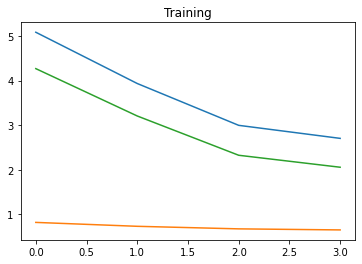

In [609]:
plt.title("Training")
for loss in list(history.history.keys())[:3]:
    plt.plot(list(range(epochs)), history.history[loss])

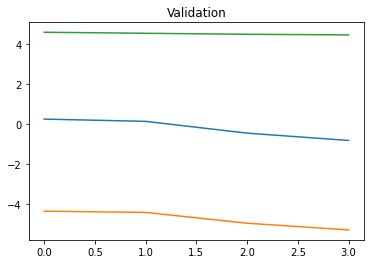

In [633]:
plt.title("Validation")
for loss in list(history.history.keys())[3:]:
    plt.plot(list(range(epochs)), history.history[loss])

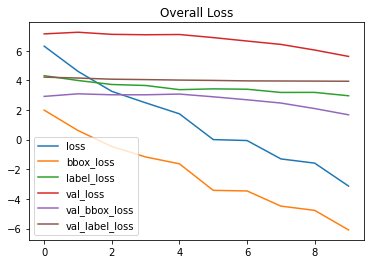

In [667]:
plt.title("Overall Loss")
for loss in list(history.history.keys()):
    plt.plot(list(range(epochs)), history.history[loss])
plt.legend(list(history.history.keys()))

In [693]:
#image, (224, 224), [0.3,0.2,0.55,0.8]
def plot_img(image, size, coords, category):
    x1=int(coords[0]*size[0])
    y1=int(coords[1]*size[1])
    x2=int(coords[2]*size[0])
    y2=int(coords[3]*size[1])
    print(x1,y1,x2,y2)
    cv2.putText(image, category, (x1,y1), 0, 5, (255, 0, 0), 15, cv2.LINE_AA)
    image = cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 10)
    plt.imshow(image, cmap='gray')

In [673]:
data[0][0]

array([0.8729182 , 0.33364877, 0.59610355, 0.4919859 ], dtype=float32)

1/1 [==============================] - 0s 350ms/step
1788 512 1221 756


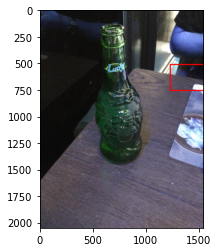

In [697]:
original=cv2.imread(r'C:\Users\alexa\Desktop\Recycler Pro\taco\data\batch_1\000006.jpg')
img=cv2.resize(original, (width,height))
img=np.expand_dims(img, axis=0)/ 255.0

data=model.predict(img)
plot_img(original, (original.shape[0], original.shape[1]), data[0][0], classmap[data[1][0].argmax()])

In [670]:
from tensorflow.python.saved_model.save import save

model.save('model.h5')

In [696]:
!tensorflowjs_converter --input_format keras ./model.h5 ./model

#this is done on colab

Traceback (most recent call last):
  File "C:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\alexa\AppData\Local\Programs\Python\Python310\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflowjs\converters\converter.py", line 37, in <module>
    from tensorflowjs.converters import

_______

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
    
NUMCLASSES=59
input_shape=(224, 224, 3)
    
inputs = L.Input(input_shape)
backbone = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=inputs,
    alpha=1.0
)
backbone.trainable = True
x = backbone.output
x = L.Conv2D(256, kernel_size=1, padding="same")(x)
x = L.BatchNormalization()(x)
x = L.Activation("relu")(x)
x = L.GlobalAveragePooling2D()(x)
x = L.Dropout(0.5)(x)
bbox = L.Dense(4, activation="sigmoid", name="bbox")(x)
label = L.Dense(NUMCLASSES, activation="softmax", name="label")(x)

model = Model(inputs=[inputs], outputs=[bbox, label])

In [ ]:
model.summary()

In [ ]:
model.compile(
    loss = {
        "bbox": "binary_crossentropy",
        "label": "sparse_categorical_crossentropy"
    },
    optimizer="Adam"
)
history = model.fit(X_train, y_train, batch_size=32, epochs=10)

In [ ]:
import tensorflow_hub as hub

detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

In [ ]:
detector(np.array([cv2.imread('drinkingwaste\Images_of_Waste\YOLO_imgs\AluCan1,000.jpg')]))

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers as L

NUMCLASSES=59
input_shape=tf.constant([255,255,3])

backbone = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=input_shape
)
backbone.trainable = True

inputs = L.Input(input_shape)
x = backbone(inputs)
x = L.Conv2D(256, kernel_size=1, padding="same")(x)
x = L.BatchNormalization()(x)
x = L.Activation("relu")(x)
x = L.GlobalAveragePooling2D()(x)
x = L.Dropout(0.5)(x)
bbox = L.Dense(4, activation="sigmoid", name="bbox")(x)
label = L.Dense(NUMCLASSES, activation="softmax", name="label")(x)

model = Model(inputs=inputs, outputs=[bbox, label])
model.compile(
    loss = {
        "bbox": "binary_crossentropy",
        "label": "sparse_categorical_crossentropy"
    },
    optimizer="Adam"
)
model.summary()

In [ ]:
model.fit(train_data, epochs=5, steps_per_epoch=len(train_data_aug), validation_data=test_data, validation_steps=len(test_data))

In [ ]:
#model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
from tensorflow.python.saved_model.save import save

model.save('test.h5')

In [ ]:
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model test.h5 /model